In [1]:
import pandas as pd
import numpy as np
df_original = pd.read_excel('yearly_data.xlsx', header=3)

In [2]:
# Drop columns
df = df_original.drop(df_original.columns[[2,3,6]], axis=1)

# Rename columns
renamed_columns = {
    'FLO start US/Eastern ': 'date_time',
    'Hour Starting': 'hour',
    'Total Delivered Energy Cost ($/MWh)': 'cost_elec',
    'Outside Temp F': 'T_OA',
    'House Power Required AvgKw': 'Q_load'
}
df.rename(columns=renamed_columns, inplace=True)

# Convert outside air temperature from °F to °C
df['T_OA'] = df['T_OA'].apply(lambda x: round(5/9 * (x-32),2))

# Convert Q_load (W) to m_load (kg/s)
cp, Delta_T_load = 4187, 11.111
df['Q_load'] = df['Q_load'].apply(lambda x: round(x*1000/cp/Delta_T_load,3))
df.rename(columns={'Q_load': 'm_load'}, inplace=True)

# Keep only date
df['date_time'] = df['date_time'].dt.date
df.rename(columns={'date_time': 'date'}, inplace=True)

df.head()

,date,hour,cost_elec,T_OA,m_load
0,2022-01-01,00:00,69.39,-3.89,0.127
1,2022-01-01,01:00,64.75,-3.33,0.124
2,2022-01-01,02:00,63.84,-2.78,0.122
3,2022-01-01,03:00,63.31,-3.33,0.124
4,2022-01-01,04:00,63.17,-3.33,0.123


In [3]:
# Find the numbr of days that feature negative electricity prices
df_neg = df[df.cost_elec < 0]

print(f"There are {len(df_neg)} hours in the year in which the electricity price is negative")
display(df_neg)

print(f"\nThe most common hours to have a negative price are:")
print(df_neg.hour.value_counts())

df_neg = df_neg.groupby('date', as_index=False).mean()
print(f"\nThere are {len(df_neg)} days in the year in which at least one electricity price is negative")
display(df_neg.date)

There are 51 hours in the year in which the electricity price is negative


,date,hour,cost_elec,T_OA,m_load
72,2022-01-04,00:00,-44.52,3.33,0.087
73,2022-01-04,01:00,-82.02,2.22,0.093
74,2022-01-04,02:00,-7.02,-0.56,0.109
1536,2022-03-06,00:00,-4.11,-1.11,0.112
1921,2022-03-22,02:00,-18.27,2.78,0.090
1922,2022-03-22,03:00,-8.28,0.56,0.103
2399,2022-04-10,00:00,-32.45,-2.22,0.124
2400,2022-04-10,01:00,-53.69,-2.78,0.124
2401,2022-04-11,02:00,-65.77,-2.78,0.130
2403,2022-04-11,04:00,-18.27,-2.78,0.133



The most common hours to have a negative price are:
00:00    9
02:00    8
01:00    5
22:00    5
03:00    3
04:00    3
14:00    3
15:00    3
23:00    3
16:00    2
21:00    2
13:00    2
05:00    1
18:00    1
06:00    1
Name: hour, dtype: int64

There are 25 days in the year in which at least one electricity price is negative


0     2022-01-04
1     2022-03-06
2     2022-03-22
3     2022-04-10
4     2022-04-11
5     2022-04-14
6     2022-04-15
7     2022-04-28
8     2022-05-01
9     2022-05-10
10    2022-05-11
11    2022-05-15
12    2022-05-22
13    2022-05-30
14    2022-05-31
15    2022-06-02
16    2022-06-18
17    2022-06-19
18    2022-12-01
19    2022-12-02
20    2022-12-03
21    2022-12-06
22    2022-12-18
23    2022-12-26
24    2022-12-27
Name: date, dtype: object

In [4]:
# Check correlation between T_OA and m_load
from scipy import stats
correlation, p_value = stats.spearmanr(df.T_OA, df.m_load)
print(f"Correlation: {round(correlation,2)}, p-value: {p_value}")

# Justifies removing the outside air temperature from the clustering features
# Indeed, the whole code with df['T_OA'] = df['m_load'] pretty much doesn't change the clusters

Correlation: -0.99, p-value: 0.0


In [5]:
# Group data by date and get average of the rest
df_daily = df.groupby('date', as_index=False).mean()

# If you want to use the standard deviation of cost_elec instead of T_OA
#df_daily_std = df.groupby('date')['cost_elec'].std().reset_index()
#df_daily_std.columns = ['date', 'cost_elec_std']
#df_daily = pd.merge(df_daily, df_daily_std, on='date')
#df_daily = df_daily[['date','cost_elec','cost_elec_std','m_load']]
#df_daily.rename(columns={'cost_elec_std': 'T_OA'}, inplace=True)

df_daily_with_date = df_daily
df_daily = df_daily[['cost_elec','m_load','T_OA']]
df_daily.head()

,cost_elec,m_load,T_OA
0,176.581667,0.115542,-1.759583
1,172.049583,0.105833,0.022500
2,188.702083,0.097917,1.410833
3,56.554167,0.099833,1.041250
4,58.674167,0.124250,-3.334167


In [6]:
# Find and remove days in which there is no load
zeros = df_daily[df_daily.m_load==0].index
df_daily = df_daily.drop(zeros)
print(f"Removed {len(zeros)} days in the year where there is no load.")

Removed 57 days in the year where there is no load.


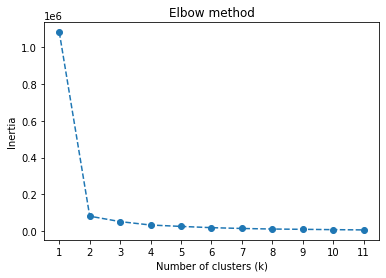

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the elec prices to be between 0 and 1
# min_elec = df_daily['cost_elec'].min()
# max_elec = df_daily['cost_elec'].max()
# df_daily['cost_elec'] = (df_daily['cost_elec'] - min_elec) / (max_elec - min_elec)
# 
# # Scale the loads to be between 0 and 1
# min_load = df_daily['m_load'].min()
# max_load = df_daily['m_load'].max()
# df_daily['m_load'] = (df_daily['m_load'] - min_load) / (max_load - min_load)
# 
# # Scale the temperatures between 0 and 1
# min_temp = df_daily['T_OA'].min()
# max_temp = df_daily['T_OA'].max()
# df_daily['T_OA'] = (df_daily['T_OA'] - min_temp) / (max_temp - min_temp)

# Finding the best k for k-means clustering
inertia = []
for k in range(1, 12):
    #kmeans = KMeans(n_clusters=k, random_state=42)
    #kmeans.fit(df_daily)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(np.array(df_daily['cost_elec']).reshape(-1, 1))
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 12), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.xticks(range(1, 12))
plt.savefig(f"clusters/elbow.png")
plt.show()

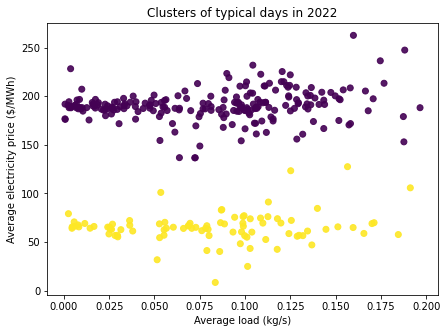

In [9]:
# Get the clusters
# kmeans = KMeans(n_clusters=6, random_state=42).fit(df_daily)
kmeans = KMeans(n_clusters=2, random_state=42).fit(np.array(df_daily['cost_elec']).reshape(-1, 1))

# Undo the scaling
# df_daily['cost_elec'] = df_daily['cost_elec'] * (max_elec - min_elec) + min_elec
# df_daily['m_load'] = df_daily['m_load'] * (max_load - min_load) + min_load
# df_daily['T_OA'] = df_daily['T_OA'] * (max_temp - min_temp) + min_temp

# Choice of plot (including or not T_OA)
plot_choice = "2D"

# 2D PLOT
if plot_choice == "2D":
    
    # Plot the clusters
    fig = plt.figure(figsize=(7,5), facecolor='white')
    plt.scatter(df_daily.m_load, df_daily.cost_elec, c=kmeans.labels_, alpha=0.9)

    # Plot the centroids
    #for c in kmeans.cluster_centers_:
        #c[0] = c[0] * (max_elec - min_elec) + min_elec
        #c[1] = c[1] * (max_load - min_load) + min_load
        #c[2] = c[2] * (max_temp - min_temp) + min_temp
        #plt.scatter(c[1], c[0], marker="o", color="red")

    # Axis labels and title
    plt.ylabel("Average electricity price ($/MWh)")
    plt.xlabel("Average load (kg/s)")
    plt.title("Clusters of typical days in 2022")

# 3D PLOT
if plot_choice == "3D":
    
    # Plot the clusters
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10,8), facecolor='white')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_daily.m_load, df_daily.T_OA, df_daily.cost_elec, c=kmeans.labels_, alpha=0.9)

    # Plot the centroids
    for c in kmeans.cluster_centers_:
        c[0] = c[0] * (max_elec - min_elec) + min_elec
        c[1] = c[1] * (max_load - min_load) + min_load
        c[2] = c[2] * (max_temp - min_temp) + min_temp
        ax.scatter(c[1], c[2], c[0], marker="o", color="red")

    # Axis labels and title
    ax.set_xlabel("Load (kg/s)")
    ax.set_ylabel("Outside temperature (°C)")
    ax.set_zlabel("Electricity prices ($/MWh)")
    ax.set_title("Clusters of typical days in 2022")
        
    # Get rid of the panes and set view
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.view_init(20, 80)

plt.savefig(f"clusters/clusters_{plot_choice}.png")
plt.show()

In [ ]:
# Get cluster labels for each row in df_daily
cluster_labels = kmeans.labels_

# Add cluster labels to df_daily as a new column
df_daily['cluster'] = cluster_labels
df_daily_cluster = df_daily

# Add date again
df_daily_cluster = df_daily_cluster.merge(df_daily_with_date, left_index=True, right_index=True, suffixes=('', '_df2'))
df_daily_cluster = df_daily_cluster.drop(df_daily_cluster.columns[[5,6,7]], axis=1)
df_daily_cluster = df_daily_cluster[['date', 'cost_elec', 'm_load', 'T_OA', 'cluster']]
df_daily_cluster['date'] = pd.to_datetime(df_daily_cluster['date'])

# Modify the assigned cluster for certain dates 
df_daily_cluster.loc[df_daily_cluster['date'] == '15-05-2022', 'cluster'] = 6
df_daily_cluster[df_daily_cluster['date'] == '15-05-2022']

In [ ]:
for i in range(len(kmeans.cluster_centers_)):
    c = kmeans.cluster_centers_[i]
    print(f"Cluster {i}:")
    #print(f"- Centroid: ({round(c[0],2)}, {round(c[1],2)}, {round(c[2],2)})")
    print(f"- Count: {len(df_daily_cluster[df_daily_cluster['cluster']==i])}\n")

In [ ]:
def print_profiles(number, data_column):

    # Isolate all rows that below to the same cluser ("number")
    df_cluster1 = df_daily_cluster[df_daily_cluster['cluster']==number].reset_index().drop('index',axis=1)

    # Initialize a dictionnary with hourly lists of values for all isolated rows
    dict_hourly = {}
    for i in range(24):
        key = f'hour{i}'
        dict_hourly[key] = []
    
    # For each row (date), get corresponding hourly values
    for i in range(len(df_cluster1)):
        
        current_date = df_cluster1.date[i]
        current_date_hours = df[df['date']== current_date].reset_index()
        # print(current_date_hours)
        
        # Filter out the part of the df that is at time j
        current_data_hours_hour0 = current_date_hours[current_date_hours['hour']=='00:00'].reset_index()
        current_data_hours_hour1 = current_date_hours[current_date_hours['hour']=='01:00'].reset_index()
        current_data_hours_hour2 = current_date_hours[current_date_hours['hour']=='02:00'].reset_index()
        current_data_hours_hour3 = current_date_hours[current_date_hours['hour']=='03:00'].reset_index()
        current_data_hours_hour4 = current_date_hours[current_date_hours['hour']=='04:00'].reset_index()
        current_data_hours_hour5 = current_date_hours[current_date_hours['hour']=='05:00'].reset_index()
        current_data_hours_hour6 = current_date_hours[current_date_hours['hour']=='06:00'].reset_index()
        current_data_hours_hour7 = current_date_hours[current_date_hours['hour']=='07:00'].reset_index()
        current_data_hours_hour8 = current_date_hours[current_date_hours['hour']=='08:00'].reset_index()
        current_data_hours_hour9 = current_date_hours[current_date_hours['hour']=='09:00'].reset_index()
        current_data_hours_hour10 = current_date_hours[current_date_hours['hour']=='10:00'].reset_index()
        current_data_hours_hour11 = current_date_hours[current_date_hours['hour']=='11:00'].reset_index()
        current_data_hours_hour12 = current_date_hours[current_date_hours['hour']=='12:00'].reset_index()
        current_data_hours_hour13 = current_date_hours[current_date_hours['hour']=='13:00'].reset_index()
        current_data_hours_hour14 = current_date_hours[current_date_hours['hour']=='14:00'].reset_index()
        current_data_hours_hour15 = current_date_hours[current_date_hours['hour']=='15:00'].reset_index()
        current_data_hours_hour16 = current_date_hours[current_date_hours['hour']=='16:00'].reset_index()
        current_data_hours_hour17 = current_date_hours[current_date_hours['hour']=='17:00'].reset_index()
        current_data_hours_hour18 = current_date_hours[current_date_hours['hour']=='18:00'].reset_index()
        current_data_hours_hour19 = current_date_hours[current_date_hours['hour']=='19:00'].reset_index()
        current_data_hours_hour20 = current_date_hours[current_date_hours['hour']=='20:00'].reset_index()
        current_data_hours_hour21 = current_date_hours[current_date_hours['hour']=='21:00'].reset_index()
        current_data_hours_hour22 = current_date_hours[current_date_hours['hour']=='22:00'].reset_index()
        current_data_hours_hour23 = current_date_hours[current_date_hours['hour']=='23:00'].reset_index()
        #print(current_data_hours_hour7)

        # There are two dates that generate errors, ignore them
        if (len(current_data_hours_hour0) != 0) & (len(current_data_hours_hour2) != 0): 
    
            if current_data_hours_hour0.level_0[0] == 0: 
                dict_hourly['hour0'].append(round(current_data_hours_hour0[data_column][0],3))
                dict_hourly['hour1'].append(round(current_data_hours_hour1[data_column][0],3))
                dict_hourly['hour2'].append(round(current_data_hours_hour2[data_column][0],3))
                dict_hourly['hour3'].append(round(current_data_hours_hour3[data_column][0],3))
                dict_hourly['hour4'].append(round(current_data_hours_hour4[data_column][0],3))
                dict_hourly['hour5'].append(round(current_data_hours_hour5[data_column][0],3))
                dict_hourly['hour6'].append(round(current_data_hours_hour6[data_column][0],3))
                dict_hourly['hour7'].append(round(current_data_hours_hour7[data_column][0],3))
                dict_hourly['hour8'].append(round(current_data_hours_hour8[data_column][0],3))
                dict_hourly['hour9'].append(round(current_data_hours_hour9[data_column][0],3))
                dict_hourly['hour10'].append(round(current_data_hours_hour10[data_column][0],3))
                dict_hourly['hour11'].append(round(current_data_hours_hour11[data_column][0],3))
                dict_hourly['hour12'].append(round(current_data_hours_hour12[data_column][0],3))
                dict_hourly['hour13'].append(round(current_data_hours_hour13[data_column][0],3))
                dict_hourly['hour14'].append(round(current_data_hours_hour14[data_column][0],3))
                dict_hourly['hour15'].append(round(current_data_hours_hour15[data_column][0],3))
                dict_hourly['hour16'].append(round(current_data_hours_hour16[data_column][0],3))
                dict_hourly['hour17'].append(round(current_data_hours_hour17[data_column][0],3))
                dict_hourly['hour18'].append(round(current_data_hours_hour18[data_column][0],3))
                dict_hourly['hour19'].append(round(current_data_hours_hour19[data_column][0],3))
                dict_hourly['hour20'].append(round(current_data_hours_hour20[data_column][0],3))
                dict_hourly['hour21'].append(round(current_data_hours_hour21[data_column][0],3))
                dict_hourly['hour22'].append(round(current_data_hours_hour22[data_column][0],3))
                dict_hourly['hour23'].append(round(current_data_hours_hour23[data_column][0],3))

            # To deal with time changes throughout the year
            elif current_data_hours_hour0.level_0[0] == 22: 
                dict_hourly['hour0'].append(round(current_data_hours_hour1[data_column][0],3))
                dict_hourly['hour1'].append(round(current_data_hours_hour2[data_column][0],3))
                dict_hourly['hour2'].append(round(current_data_hours_hour3[data_column][0],3))
                dict_hourly['hour3'].append(round(current_data_hours_hour4[data_column][0],3))
                dict_hourly['hour4'].append(round(current_data_hours_hour5[data_column][0],3))
                dict_hourly['hour5'].append(round(current_data_hours_hour6[data_column][0],3))
                dict_hourly['hour6'].append(round(current_data_hours_hour7[data_column][0],3))
                dict_hourly['hour7'].append(round(current_data_hours_hour8[data_column][0],3))
                dict_hourly['hour8'].append(round(current_data_hours_hour9[data_column][0],3))
                dict_hourly['hour9'].append(round(current_data_hours_hour10[data_column][0],3))
                dict_hourly['hour10'].append(round(current_data_hours_hour11[data_column][0],3))
                dict_hourly['hour11'].append(round(current_data_hours_hour12[data_column][0],3))
                dict_hourly['hour12'].append(round(current_data_hours_hour13[data_column][0],3))
                dict_hourly['hour13'].append(round(current_data_hours_hour14[data_column][0],3))
                dict_hourly['hour14'].append(round(current_data_hours_hour15[data_column][0],3))
                dict_hourly['hour15'].append(round(current_data_hours_hour16[data_column][0],3))
                dict_hourly['hour16'].append(round(current_data_hours_hour17[data_column][0],3))
                dict_hourly['hour17'].append(round(current_data_hours_hour18[data_column][0],3))
                dict_hourly['hour18'].append(round(current_data_hours_hour19[data_column][0],3))
                dict_hourly['hour19'].append(round(current_data_hours_hour20[data_column][0],3))
                dict_hourly['hour20'].append(round(current_data_hours_hour21[data_column][0],3))
                dict_hourly['hour21'].append(round(current_data_hours_hour22[data_column][0],3))
                dict_hourly['hour22'].append(round(current_data_hours_hour23[data_column][0],3))
                dict_hourly['hour23'].append(round(current_data_hours_hour0[data_column][0],3))
    
        else: print("Discarded 1 data point")
            
    # --------------------------------
    # PLOTS
    # --------------------------------

    # Find the average price and load forecast for the elements in each cluster. Remove outliers?
    plt.figure(figsize=(14,5), facecolor='white')
    for j in range(24):
        plt.boxplot(dict_hourly[f"hour{j}"], positions=[j], showfliers=False)
        plt.xlabel("Time [hours]")
        if data_column == 'cost_elec':
            plt.ylabel("Electricity price [$/MWh]")
            plt.title(f"Electricty price profile for cluster {number} (count: {len(df_cluster1)})")
            plt.ylim([-100,600])
        else:
            plt.ylabel("Load mass flow rate (kg/s)")
            plt.title(f"Load profile for cluster {number} (count: {len(df_cluster1)})")
            plt.ylim([0,0.25])
    
    # Plot the prices by median
    medians = [round(np.median(dict_hourly[f"hour{j}"]),2) for j in range(24)]
    plt.plot(medians)
    
    for j in range(len(dict_hourly['hour0'])):
        plt.plot([value[j] for value in dict_hourly.values()], alpha = 0.2, linestyle='dashed', label=f"{j}")
    
    if data_column=='cost_elec': plt.savefig(f"elec_load_profiles/elec_cluster{number}.png")
    else: plt.savefig(f"elec_load_profiles/load_cluster{number}.png") 
    plt.show()

    # Convert electricity prices to cts/kWh
    if data_column == 'cost_elec': medians = [round(x/1000*100,2) for x in medians]

    # Print the median price/load profile
    print(medians)
    return(medians)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

elec_medians_dict = {}
load_medians_dict = {}

for number in range(7):
    print("\n------------------------------------------------")
    print(f"------------------- CLUSTER {number} ------------------")
    print("------------------------------------------------\n")
    elec_medians_dict[f'cluster{number}'] = print_profiles(number, 'cost_elec')    
    load_medians_dict[f'cluster{number}'] = print_profiles(number, 'm_load')

warnings.resetwarnings()

In [ ]:
print("------------------------------------------------")
print("Electricity price profiles by cluster (cts/kWh):")
print("------------------------------------------------\n")

for key, value in elec_medians_dict.items():
    print(f"{key}:\n{value}\n")

print("------------------------------------------------")
print("Load profiles by cluster:")
print("------------------------------------------------\n")

for key, value in load_medians_dict.items():
    print(f"{key}:\n{value}\n")

# Plot the clusters
plt.figure(figsize=(14,5), facecolor='white')
for key, value in elec_medians_dict.items():
    if key == "cluster0" or key == "cluster1": plt.step(range(len(value)), value, where='post', label=f"{key}", alpha=0.7)
plt.title("Median daily electricity price profile per cluster")
plt.xlabel("Time [hours]")
plt.ylabel("Electricity price [cts/kWh]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"clusters/median_prices.png")
plt.show() 

plt.figure(figsize=(14,5), facecolor='white')
for key, value in load_medians_dict.items():
    if key == "cluster0" or key == "cluster1": plt.step(range(len(value)), value, where='post', label=f"{key}", alpha=0.7)
plt.xlabel("Time [hours]")
plt.ylabel("Load mass flow rate [kg/s]")
plt.ylim([0,0.2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
warnings.filterwarnings('ignore')
df_new = df_daily_cluster[['date','cluster']]
df_new['cluster'] += 1
warnings.resetwarnings()

conditions = [
    (df_new['cluster'] == 1),
    (df_new['cluster'] == 2),
    (df_new['cluster'] == 3),
    (df_new['cluster'] == 4),
    (df_new['cluster'] == 5),
    (df_new['cluster'] == 6),
    (df_new['cluster'] == 7),
]
colors = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'black'
]
color_values = np.select(conditions, colors, default='yellow')

plt.figure(figsize=(13, 2))
plt.bar(df_new['date'], df_new['cluster'], color=color_values, alpha=0.7, width=1)
plt.ylim([0,1])
plt.yticks([])

legend_labels = {1: 'Cluster 0', 2: 'Cluster 1', 3: 'Cluster 2', 4: 'Cluster 3', 5: 'Cluster 4', 6: 'Cluster 5', 7: 'Cluster 6'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[i] for i in range(1, len(colors)+1)], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()